In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# === Mac용 한글 폰트 설정 ===
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# === 엑셀 파일 경로 (Mac 경로로 수정) ===
file_path = "/Users/gimbohyeon1/Desktop/보현진영프로젝트.xlsx"

# === 파일 존재 여부 확인 ===
if not os.path.exists(file_path):
    raise FileNotFoundError(f"파일 경로가 잘못되었거나 존재하지 않습니다: {file_path}")

# === 돼지 흐름도 시트 불러오기 ===
df = pd.read_excel(file_path, sheet_name="돼지 흐름도", engine="openpyxl")

# === 돼지 흐름도 시트 칼럼명 확인 ===
print(df.columns)

Index(['date', 'jy', 'bh'], dtype='object')


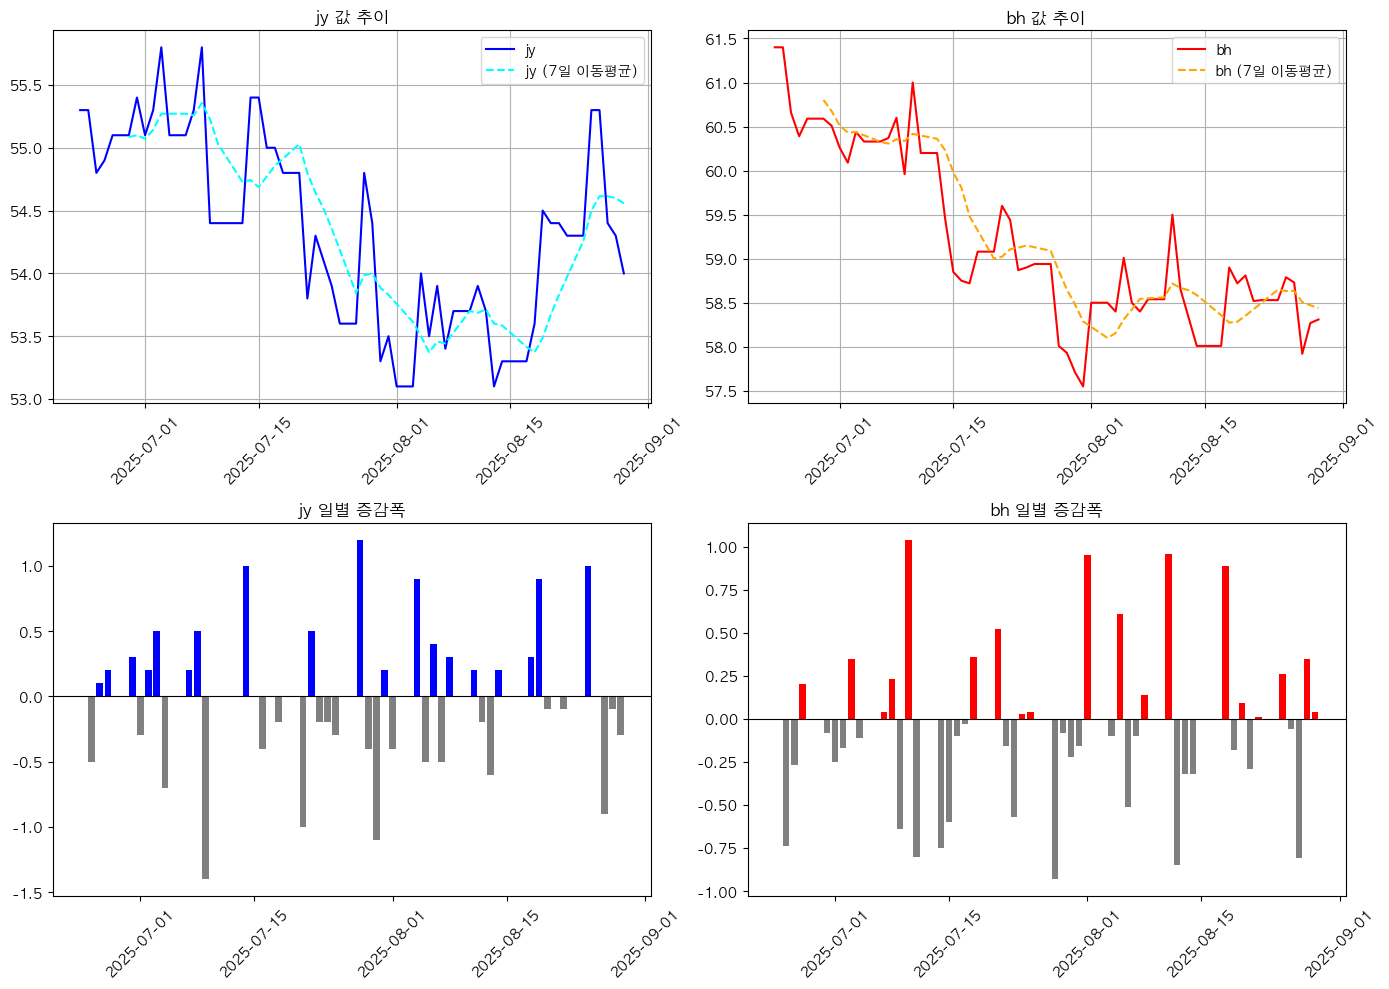

In [39]:

# 날짜형 변환
df["date"] = pd.to_datetime(df["date"])

# 🔍 8월 29일까지의 데이터만 필터링
cutoff_date = pd.to_datetime("2025-08-29")
df_filtered = df[df["date"] <= cutoff_date].copy()

# 전일 대비 증감 계산
df_filtered["jy_diff"] = df_filtered["jy"].diff()
df_filtered["bh_diff"] = df_filtered["bh"].diff()

# 7일 이동평균 계산
df_filtered["jy_MA7"] = df_filtered["jy"].rolling(window=7).mean()
df_filtered["bh_MA7"] = df_filtered["bh"].rolling(window=7).mean()

# 시각화
plt.figure(figsize=(14,10))

# 1. jy 흐름 + 이동평균
plt.subplot(2,2,1)
plt.plot(df_filtered["date"], df_filtered["jy"], label="jy", color="blue")
plt.plot(df_filtered["date"], df_filtered["jy_MA7"], label="jy (7일 이동평균)", color="cyan", linestyle="--")
plt.title("jy 값 추이")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# 2. bh 흐름 + 이동평균
plt.subplot(2,2,2)
plt.plot(df_filtered["date"], df_filtered["bh"], label="bh", color="red")
plt.plot(df_filtered["date"], df_filtered["bh_MA7"], label="bh (7일 이동평균)", color="orange", linestyle="--")
plt.title("bh 값 추이")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# 3. jy 일별 증감폭
plt.subplot(2,2,3)
plt.bar(df_filtered["date"], df_filtered["jy_diff"], color=df_filtered["jy_diff"].apply(lambda x: "blue" if x >= 0 else "gray"))
plt.axhline(0, color="black", linewidth=0.8)
plt.title("jy 일별 증감폭")
plt.xticks(rotation=45)

# 4. bh 일별 증감폭
plt.subplot(2,2,4)
plt.bar(df_filtered["date"], df_filtered["bh_diff"], color=df_filtered["bh_diff"].apply(lambda x: "red" if x >= 0 else "gray"))
plt.axhline(0, color="black", linewidth=0.8)
plt.title("bh 일별 증감폭")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

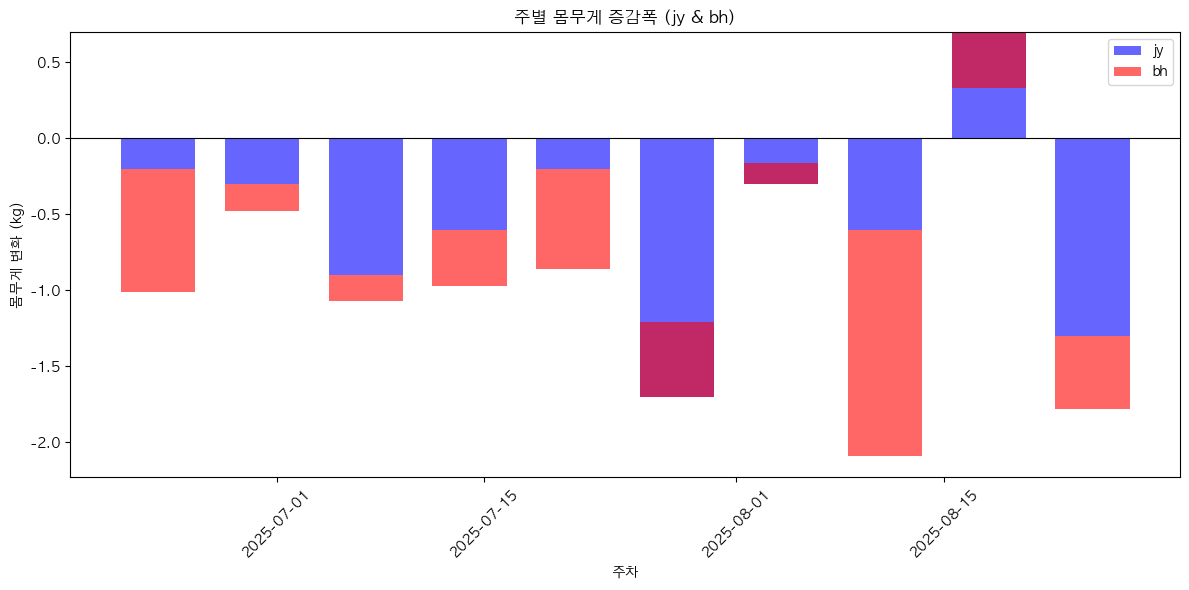

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# 날짜 변환
df["date"] = pd.to_datetime(df["date"])

# 🔍 8월 29일까지 필터링
cutoff_date = pd.to_datetime("2025-08-29")
df_filtered = df[df["date"] <= cutoff_date].copy()

# 📅 주 단위로 그룹화 (월요일 시작 기준)
df_filtered["week"] = df_filtered["date"].dt.to_period("W").apply(lambda r: r.start_time)

# 🧮 주별 증감폭 계산
weekly_change = df_filtered.groupby("week")[["jy", "bh"]].agg(["first", "last"])
weekly_change.columns = ["jy_first", "jy_last", "bh_first", "bh_last"]
weekly_change["jy_diff"] = weekly_change["jy_last"] - weekly_change["jy_first"]
weekly_change["bh_diff"] = weekly_change["bh_last"] - weekly_change["bh_first"]

# 📈 시각화
plt.figure(figsize=(12,6))

# jy 주별 증감폭
plt.bar(weekly_change.index, weekly_change["jy_diff"], width=5, label="jy", color="blue", alpha=0.6)

# bh 주별 증감폭
plt.bar(weekly_change.index, weekly_change["bh_diff"], width=5, label="bh", color="red", alpha=0.6, bottom=weekly_change["jy_diff"])

plt.axhline(0, color="black", linewidth=0.8)
plt.title("주별 몸무게 증감폭 (jy & bh)")
plt.xlabel("주차")
plt.ylabel("몸무게 변화 (kg)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
